In [ ]:
import tensorflow as tf

In [36]:
(train_imgs,train_labels),(test_imgs,test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [37]:
print(train_imgs.shape)

(50000, 32, 32, 3)


In [38]:
print(train_imgs[0])
print(train_imgs[0].dtype)

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
uint8


In [39]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[9]')

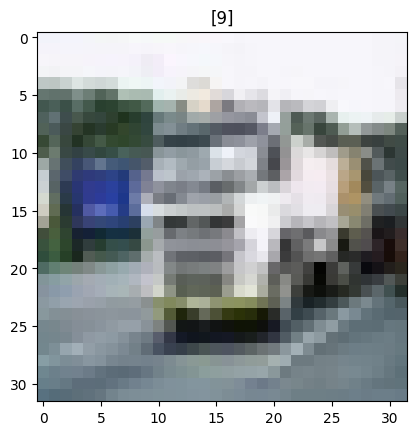

In [40]:
plt.imshow(train_imgs[1000],cmap='gray_r')
plt.title(train_labels[1000])

In [41]:
print(train_imgs.shape)
print(train_labels.shape)
print(test_imgs.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


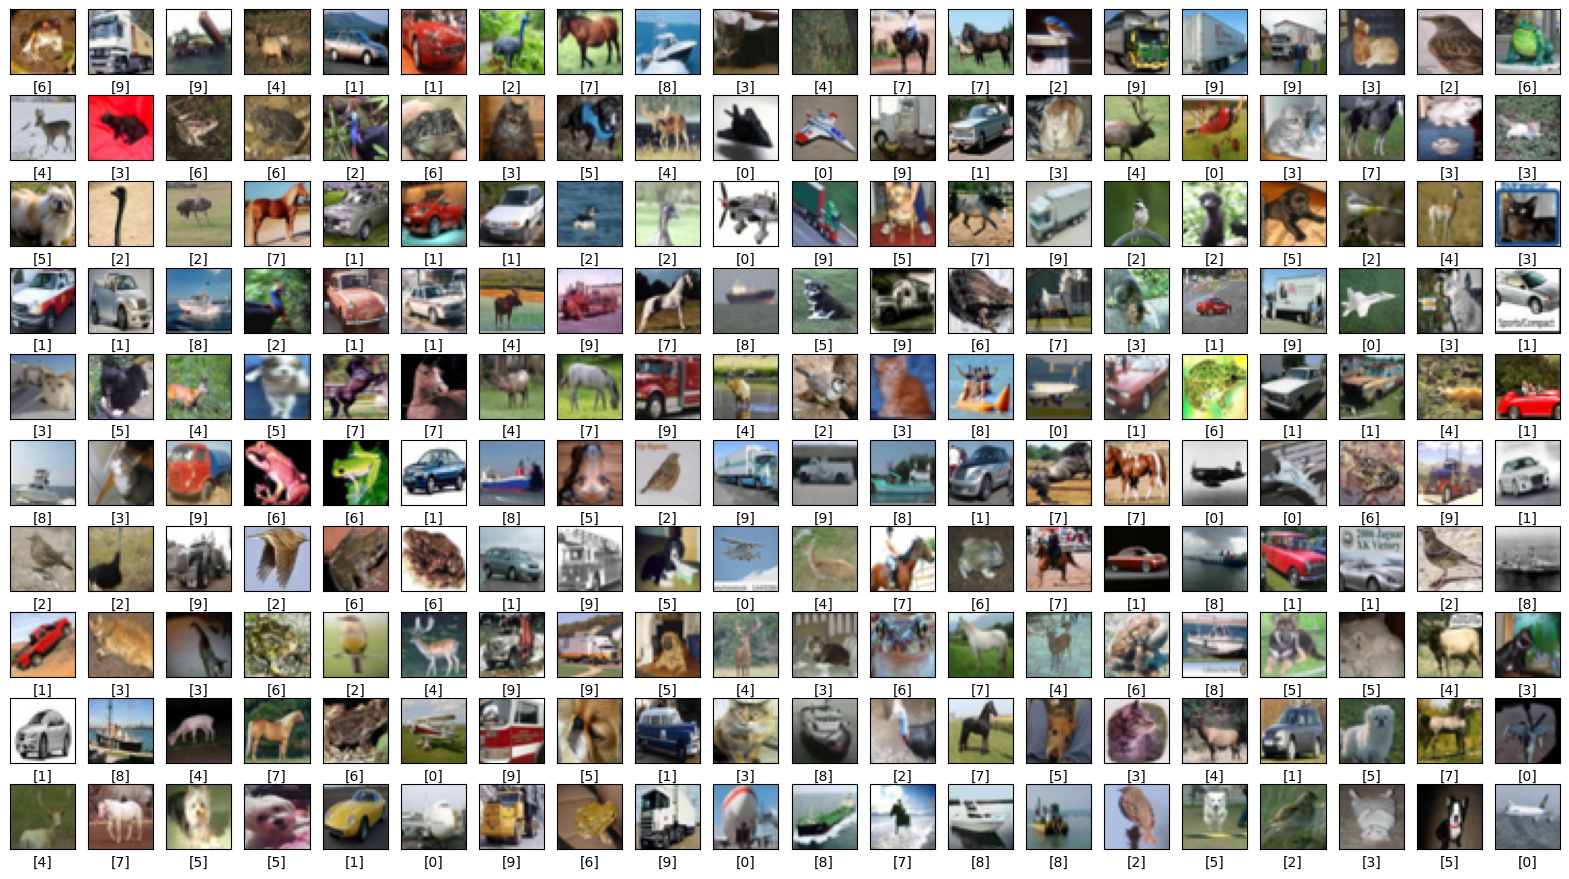

In [42]:
r = 10
c = 20
k = 0
plt.figure(figsize=(20,11))
for i in range(r):
  for j in range(c):
    plt.subplot(r,c,k+1)
    plt.imshow(train_imgs[k],cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_labels[k])
    k +=1
  plt.show

In [56]:
train_imgs_norm = train_imgs.astype("float32") / 255
test_imgs_norm = test_imgs.astype("float32") / 255


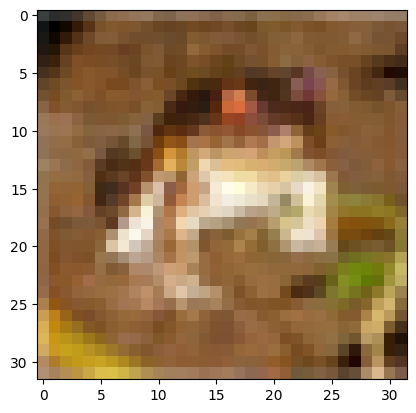

In [57]:
original_shape = (32, 32, 3)
first_image = train_imgs_norm_flat[0].reshape(original_shape)

# Visualize the first image in the training set
plt.imshow(first_image)
plt.show()

In [60]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [61]:
optimizers = ['adam', 'sgd', 'rmsprop']
history_dict = {}

for optimizer in optimizers:
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_imgs_norm, train_labels, epochs=10, validation_split=0.3, shuffle=True)
    history_dict[optimizer] = history.history


Epoch 1/10
1094/1094 [==============================] - 11s 10ms/step - loss: 2.0541 - accuracy: 0.2245 - val_loss: 1.9021 - val_accuracy: 0.2841
Epoch 2/10
1094/1094 [==============================] - 7s 6ms/step - loss: 1.8681 - accuracy: 0.3129 - val_loss: 1.8764 - val_accuracy: 0.3030
Epoch 3/10
1094/1094 [==============================] - 8s 8ms/step - loss: 1.8261 - accuracy: 0.3310 - val_loss: 1.8213 - val_accuracy: 0.3388
Epoch 4/10
1094/1094 [==============================] - 7s 6ms/step - loss: 1.8016 - accuracy: 0.3472 - val_loss: 1.8386 - val_accuracy: 0.3365
Epoch 5/10
1094/1094 [==============================] - 9s 8ms/step - loss: 1.7826 - accuracy: 0.3559 - val_loss: 1.7930 - val_accuracy: 0.3520
Epoch 6/10
1094/1094 [==============================] - 6s 6ms/step - loss: 1.7716 - accuracy: 0.3598 - val_loss: 1.8143 - val_accuracy: 0.3414
Epoch 7/10
1094/1094 [==============================] - 8s 7ms/step - loss: 1.7644 - accuracy: 0.3603 - val_loss: 1.7823 - val_accurac

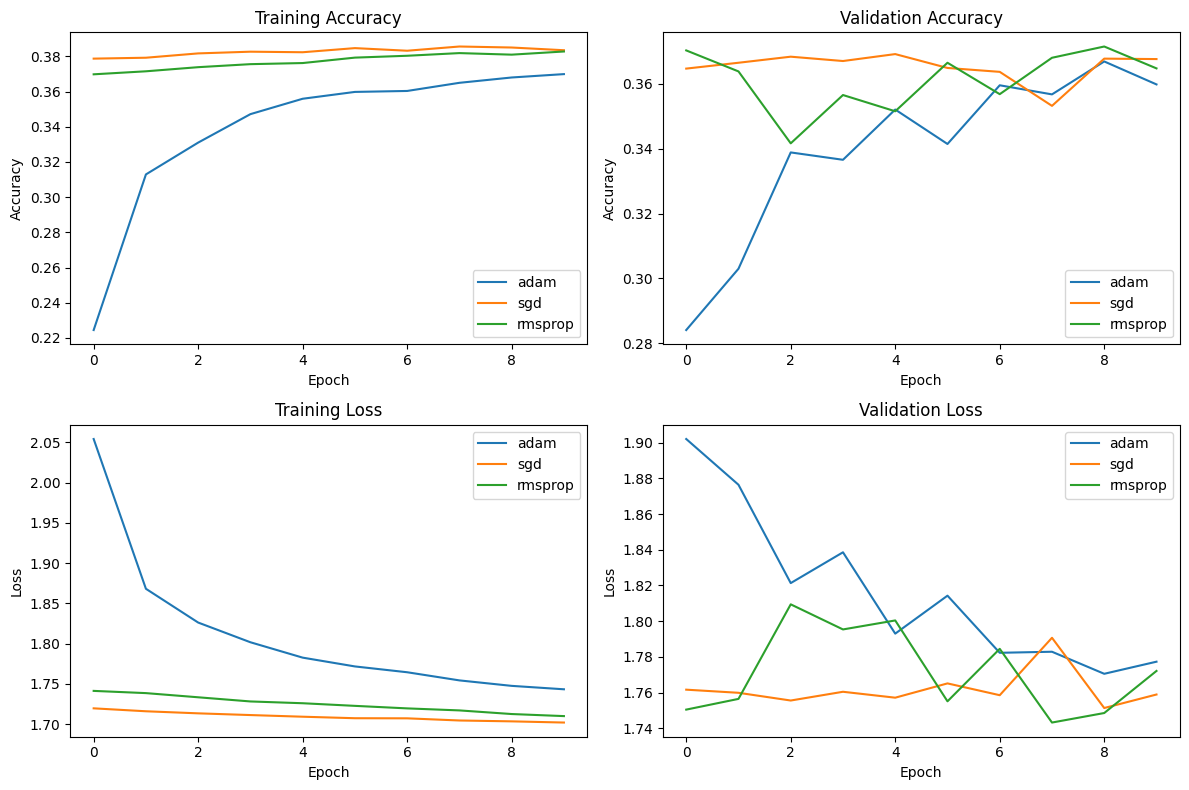

In [62]:
plt.figure(figsize=(12, 8))

# Plot training accuracy
plt.subplot(2, 2, 1)
for optimizer in optimizers:
    plt.plot(history_dict[optimizer]['accuracy'], label=optimizer)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(2, 2, 2)
for optimizer in optimizers:
    plt.plot(history_dict[optimizer]['val_accuracy'], label=optimizer)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(2, 2, 3)
for optimizer in optimizers:
    plt.plot(history_dict[optimizer]['loss'], label=optimizer)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot validation loss
plt.subplot(2, 2, 4)
for optimizer in optimizers:
    plt.plot(history_dict[optimizer]['val_loss'], label=optimizer)
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()